Основное квантовое уравнение 
	будем рассматривать оптическую полость с двум атомом и фотоном и общей энергией в начальный момент времени $E=h\omega $
   

 $$H=
 \begin{pmatrix}
h\omega & g & g \\
g & h\omega & dd \\
g & dd & h\omega
\end{pmatrix}
$$

In [27]:
from math import *
import numpy as np
import numpy.linalg as linalg

def eigensolver(H):
    e, v = linalg.eig(H)
    idx = e.argsort()[::1]   
    e = e[idx]
    v = v[:,idx]
    return e, v

In [28]:
g = 0.01
dd=0.01
# solution of the Schrodinger equation at t=0
H = np.zeros((3,3))
H[0,0] = 1
H[1,1] = 1
H[2,2] = 1
H[0,1] = g
H[0,2] = g
H[2,0] = g
H[1,0] = g
H[1,2]=dd
H[2,1]=dd
E, v = eigensolver(H)


Теперь попробуем численно решать уравнение Шредингера для матрицы плотности численно:
	 $$ih \dot{\rho}=[H,\rho]=H\rho -\rho H$$
	 для решаем уравнение шредингера с помощью методы Runge-Kutta
		


ратор  будет связывать это состояние с $|0;01>$ и$|0;10>$   посредством матрицы:
	 $$A=
 \begin{pmatrix}
0 & 0 & 1 \\
0& 0 & 0\\
0 & 0 & 0
\end{pmatrix}
$$

In [29]:
def runge_kutta_9(t,dim,fun,rho_0,gamma):

    npoints = len(t)
    rho_list = np.zeros((npoints, dim, dim), dtype=np.cdouble)
    rho = np.array(rho_0,dtype=np.cdouble)
    rho_list[0,:,:] = rho
    
    for i in range(1,npoints):

        h = t[i] - t[i-1]

        # Runge-Kutta
        k1 = fun(rho,gamma)
        k2 = fun(rho + 0.5*h*k1,gamma)
        k3 = fun(rho + 0.5*h*k2,gamma)
        k4 = fun(rho + h*k3,gamma)
        rho = rho + 1.0/6.0 * h * (k1 + 2*k2 + 2*k3 + k4)

        rho_list[i,:,:] = rho
    
    return rho_list
    
t = np.linspace(0,1000,1001)

def fun_no_leaks(rho,gamma):
    return (-1j)*(np.matmul(H, rho) - np.matmul(rho,H))

rho_list = runge_kutta_9(t, 3, fun_no_leaks, [[1,0,0],[0,0,0],[0,0,0]], 0.0)

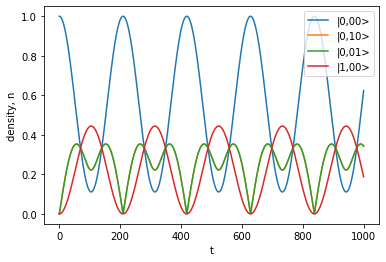

In [30]:
import matplotlib.pyplot as plt

plt.plot(t, abs(rho_list[:,0,0]), label='|0,00>')
plt.plot(t, abs(rho_list[:,0,1]), label='|0,10>')
plt.plot(t, abs(rho_list[:,1,0]), label='|0,01>')
plt.plot(t, abs(rho_list[:,1,1]), label='|1,00>')
plt.legend(loc='upper right')
plt.xlabel('t')
plt.ylabel('density, n')
plt.show()

Теперь можно переходить к решению квантового основного уравнения. Конечно, теперь необходимо завести состояние$|0;00>$ , в которое система попадает после потери фотона. Оператор  будет связывать это состояние с $|0;01>$ и$|0;10>$   посредством матрицы:

Супероператор Линдблада выглядит так:
$$\iota (\rho )=\sum_{j}^{}\gamma _{j}(A_{j}\rho A_{j}^{+}-\frac{1}{2}(A_{j}^{+}A_{j}\rho +\rho A_{j}^{+}A_{j}) )$$

[0.99 0.99 1.02]
[[-0.81649658  0.40792387  0.57735027]
 [ 0.40824829 -0.8164965   0.57735027]
 [ 0.40824829  0.40857263  0.57735027]]


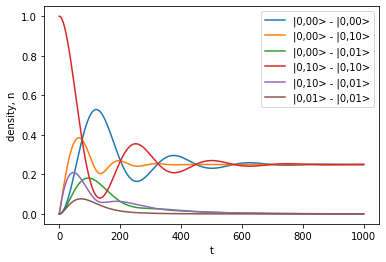

In [43]:
gamma =[0.001,0.05,0.03]
dd=0.01
# solution of the Schrodinger equation at t=0
H = np.zeros((3,3))
H[0,0] = 1
H[1,1] = 1
H[2,2] = 1
H[0,1] = g
H[0,2] = g
H[2,0] = g
H[1,0] = g
H[1,2]=dd
H[2,1]=dd
E, v = eigensolver(H)
print(E)
print(v)

A1 = np.array([[0,0,1],[0,0,0],[0,0,0]])
A1conj = np.transpose(A1)

t = np.linspace(0,1000,1001)

def fun_leak(rho,gamma):
    for i in range(0,2):
        A1conjA1 = np.matmul(A1conj, A1)
        L = gamma[i] * (np.matmul(A1[i], np.matmul(rho, A1conj)) - 0.5 * (np.matmul(A1conjA1, rho) + np.matmul(rho, A1conjA1)))
    return (-1j)*(np.matmul(H, rho) - np.matmul(rho,H)) + L

rho_list = runge_kutta_9(t, 3, fun_leak, [[0,0,0],[0,1,0],[0,0,0]], gamma)

basis_labels = ['|0,00>', '|0,10>', '|0,01>','|1,00>']

for i in range(0,3):
    for j in range(i,3):
        plt.plot(t, abs(rho_list[:,i,j]), label=basis_labels[i]+' - ' + basis_labels[j])

plt.legend(loc='upper right')
plt.xlabel('t')
plt.ylabel('density, n')
plt.show()